In [ ]:
manualUpload = False #Define se irá usar upload do Drive (automático) ou da máquina (manual)

In [ ]:
!pip install --quiet optuna
!pip install tensorflow tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import pandas as pd
import numpy as np
import optuna as op
import scipy as sp

import time
import io
import os

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from IPython.display import display
from ipywidgets import IntProgress
from tensorflow import *

from keras.layers import Input, Dropout, BatchNormalization, CuDNNGRU, CuDNNLSTM
from keras.layers import LSTM, Dense, Bidirectional, Activation
from keras.models import Sequential, Model

%matplotlib inline

In [ ]:
from ipywidgets import IntProgress
from IPython.display import display
import time

In [ ]:
if manualUpload == False:
    from google.colab import drive, files
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importação manual, caso necessária
if not os.path.exists("TST.cod"):
    if manualUpload == True:
        upload = files.upload()
        #decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
        df_test = pd.read_table(io.StringIO(upload['TST.cod'].decode('utf-8')))

    #Importação pelo Drive
    else:
        #decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
        df_test = pd.read_table("/content/drive/MyDrive/Databases/TST.cod")
else:
    df_test = pd.read_table("TST.cod")

print(df_test.columns.tolist())
df_test.head()

['INDEX',
 'UF_1',
 'UF_2',
 'UF_3',
 'UF_4',
 'UF_5',
 'UF_6',
 'UF_7',
 'IDADE',
 'SEXO_1',
 'NIVEL_RELACIONAMENTO_CREDITO01',
 'NIVEL_RELACIONAMENTO_CREDITO02',
 'BANCO_REST_IRPF_ULTIMA_1',
 'BANCO_REST_IRPF_ULTIMA_2',
 'BANCO_REST_IRPF_ULTIMA_3',
 'BANCO_REST_IRPF_ULTIMA_4',
 'BANCO_REST_IRPF_ULTIMA_5',
 'BANCO_REST_IRPF_ULTIMA_6',
 'BANCO_REST_IRPF_ULTIMA_7',
 'ATIVIDADE_EMAIL',
 'EXPOSICAO_ENDERECO',
 'EXPOSICAO_EMAIL',
 'EXPOSICAO_TELEFONE',
 'ATIVIDADE_ENDERECO',
 'ATUALIZACAO_ENDERECO',
 'ATUALIZACAO_EMAIL',
 'EXPOSICAO_CONSUMIDOR_EMAILS',
 'EXPOSICAO_CONSUMIDOR_TELEFONES',
 'ATIVIDADE_TELEFONE',
 'VALOR_PARCELA_BOLSA_FAMILIA',
 'FLAG_BOLSA_FAMILIA_1',
 'SIGLA_PARTIDO_FILIADO_1',
 'SIGLA_PARTIDO_FILIADO_2',
 'SIGLA_PARTIDO_FILIADO_3',
 'SIGLA_PARTIDO_FILIADO_4',
 'SIGLA_PARTIDO_FILIADO_5',
 'SIGLA_PARTIDO_FILIADO_6',
 'SIGLA_PARTIDO_FILIADO_7',
 'FLAG_FILIADO_PARTIDO_POLITICO_1',
 'FLAG_PROUNI_1',
 'RENDA_VIZINHANCA_1',
 'RENDA_VIZINHANCA_2',
 'RENDA_VIZINHANCA_3',
 'RENDA_VIZ

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.898745,1,...,0,1,1,1,0,0,0,0,1,0
1,1,1,1,0,1,0,0,0,0.847404,1,...,0,0,0,1,1,1,0,0,1,0
2,2,1,1,0,0,0,0,1,0.016513,0,...,0,1,0,0,1,0,0,1,0,1
3,3,1,1,0,1,0,0,0,0.688950,0,...,0,0,0,0,0,1,0,1,1,0
4,4,0,1,1,0,0,1,0,0.230114,1,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
#Importação manual, caso necessária
if not os.path.exists("TRNcod.xls"):
    if manualUpload == True:
        upload = files.upload()
        #decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
        df_tr = pd.read_table(io.StringIO(upload['TRNcod.xls'].decode('utf-8')))

    #Importação pelo Drive
    else:
        #decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
        df_tr = pd.read_table("/content/drive/MyDrive/Databases/TRNcod.xls")
else:
    df_tr = pd.read_excel("TRNcod.xls")

print(df_tr.columns.tolist())
df_tr.head()

['INDEX',
 'UF_1',
 'UF_2',
 'UF_3',
 'UF_4',
 'UF_5',
 'UF_6',
 'UF_7',
 'IDADE',
 'SEXO_1',
 'NIVEL_RELACIONAMENTO_CREDITO01',
 'NIVEL_RELACIONAMENTO_CREDITO02',
 'BANCO_REST_IRPF_ULTIMA_1',
 'BANCO_REST_IRPF_ULTIMA_2',
 'BANCO_REST_IRPF_ULTIMA_3',
 'BANCO_REST_IRPF_ULTIMA_4',
 'BANCO_REST_IRPF_ULTIMA_5',
 'BANCO_REST_IRPF_ULTIMA_6',
 'BANCO_REST_IRPF_ULTIMA_7',
 'ATIVIDADE_EMAIL',
 'EXPOSICAO_ENDERECO',
 'EXPOSICAO_EMAIL',
 'EXPOSICAO_TELEFONE',
 'ATIVIDADE_ENDERECO',
 'ATUALIZACAO_ENDERECO',
 'ATUALIZACAO_EMAIL',
 'EXPOSICAO_CONSUMIDOR_EMAILS',
 'EXPOSICAO_CONSUMIDOR_TELEFONES',
 'ATIVIDADE_TELEFONE',
 'VALOR_PARCELA_BOLSA_FAMILIA',
 'FLAG_BOLSA_FAMILIA_1',
 'SIGLA_PARTIDO_FILIADO_1',
 'SIGLA_PARTIDO_FILIADO_2',
 'SIGLA_PARTIDO_FILIADO_3',
 'SIGLA_PARTIDO_FILIADO_4',
 'SIGLA_PARTIDO_FILIADO_5',
 'SIGLA_PARTIDO_FILIADO_6',
 'SIGLA_PARTIDO_FILIADO_7',
 'FLAG_FILIADO_PARTIDO_POLITICO_1',
 'FLAG_PROUNI_1',
 'RENDA_VIZINHANCA_1',
 'RENDA_VIZINHANCA_2',
 'RENDA_VIZINHANCA_3',
 'RENDA_VIZ

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0


In [ ]:
'''
indarr = df_trein["IND_BOM_1_1"].to_numpy()
indarr2 = df_trein["IND_BOM_1_2"].to_numpy()

f = IntProgress(min = 0 , max = len(indarr)) # instantiate the bar
display(f) # display the bar

for i in range(len(indarr)):
    if indarr[i] == indarr2[i]:
        print(indarr[i], indarr2[i])
    if indarr[i] != 1 and indarr[i] != 0:
        print(f"indarr {i} = {indarr[i]}")
    if indarr2[i] != 1 and indarr2[i] != 0:
        print(f"indarr2 {i} = {indarr2[i]}")
    f.value += 1'''
#Utilizado para checar se IND_BOM_1_1 e IND_BOM_1_2 eram as duas classes separadas

'\nindarr = df_trein["IND_BOM_1_1"].to_numpy()\nindarr2 = df_trein["IND_BOM_1_2"].to_numpy()\n\nf = IntProgress(min = 0 , max = len(indarr)) # instantiate the bar\ndisplay(f) # display the bar\n\nfor i in range(len(indarr)):\n    if indarr[i] == indarr2[i]:\n        print(indarr[i], indarr2[i])\n    if indarr[i] != 1 and indarr[i] != 0:\n        print(f"indarr {i} = {indarr[i]}")\n    if indarr2[i] != 1 and indarr2[i] != 0:\n        print(f"indarr2 {i} = {indarr2[i]}")\n    f.value += 1'

In [ ]:
if "IND_BOM_1_1" in df_tr:
    df_tr = df_tr.drop(columns = ["IND_BOM_1_1"])
if "INDEX" in df_tr:
    df_tr = df_tr.drop(columns = ["INDEX"])
if "IND_BOM_1_2" in df_tr:
    df_tr = df_tr.rename(columns = {"IND_BOM_1_2": "CLASSE_INDIV"})

df_tr.head()

#0 = Classe 1
#1 = Classe 2

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,CLASSE_INDIV
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,0,1,1,0,1,1,1,1
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,0,1,0,1,1,0,0,0,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,0,1,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,0,1,1,0,1,1,0,1,0,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,1,0,0,1,0,1,0


In [ ]:
df_tr1 = df_tr[df_tr['CLASSE_INDIV'] == 0]
df_tr2 = df_tr[df_tr['CLASSE_INDIV'] == 1]

df_tr1a = df_tr1.sample(frac = 0.66)
df_tr1b = df_tr1.drop(df_tr1a.index)
df_tr1 = None

df_tr2a = df_tr2.sample(frac = 0.66)
df_tr2b = df_tr2.drop(df_tr2a.index)
df_tr2 = None

df_tr2a = pd.concat([df_tr2a, df_tr2a.sample(len(df_tr1a) - len(df_tr2a))], ignore_index = True, sort = False)
df_tr2b = pd.concat([df_tr2b, df_tr2b.sample(len(df_tr1b) - len(df_tr2b))], ignore_index = True, sort = False)

df_trein = pd.concat([df_tr1a, df_tr2a])
df_valid = pd.concat([df_tr1b, df_tr2b])

df_tr1a = None
df_tr1b = None
df_tr2a = None
df_tr2b = None

df_trein = shuffle(df_trein).reset_index().drop(columns = ["index"])
df_valid = shuffle(df_valid).reset_index().drop(columns = ["index"])

In [ ]:
df_treinX = df_trein.drop(columns = ["CLASSE_INDIV"])
df_treinY = df_trein["CLASSE_INDIV"]
df_validX = df_valid.drop(columns = ["CLASSE_INDIV"])
df_validY = df_valid["CLASSE_INDIV"]

In [ ]:
patienceCallback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 20)

In [ ]:
MLPmodel = Sequential([
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'sigmoid'),
    Dense(10, activation = 'sigmoid'),
    ])

MLPmodel.compile(optimizer = 'adam',
      loss = 'mse',
      metrics=['accuracy'])

MLPmodel.fit(df_treinX, df_treinY, epochs = 10000, 
          batch_size = 2000, callbacks = [patienceCallback],  
          validation_data = (df_validX, df_validY))

Epoch 1/10000
169/169 [==============================] - 8s 39ms/step - loss: 0.2331 - accuracy: 0.0927 - val_loss: 0.2271 - val_accuracy: 0.0919
Epoch 2/10000
169/169 [==============================] - 7s 44ms/step - loss: 0.2240 - accuracy: 0.0926 - val_loss: 0.2243 - val_accuracy: 0.0938
Epoch 3/10000
169/169 [==============================] - 7s 39ms/step - loss: 0.2220 - accuracy: 0.0924 - val_loss: 0.2230 - val_accuracy: 0.1116
Epoch 4/10000
169/169 [==============================] - 7s 43ms/step - loss: 0.2203 - accuracy: 0.0869 - val_loss: 0.2228 - val_accuracy: 0.0767
Epoch 5/10000
169/169 [==============================] - 7s 39ms/step - loss: 0.2189 - accuracy: 0.0864 - val_loss: 0.2220 - val_accuracy: 0.1101
Epoch 6/10000
169/169 [==============================] - 6s 36ms/step - loss: 0.2176 - accuracy: 0.0862 - val_loss: 0.2243 - val_accuracy: 0.0532
Epoch 7/10000
169/169 [==============================] - 10s 58ms/step - loss: 0.2160 - accuracy: 0.0869 - val_loss: 0.2221 

In [ ]:
import numpy as np
from scipy import stats

stats.ks_2samp(df_validY, df_test)

In [ ]:
RFmodel = tfdf.keras.RandomForestModel()

RFmodel.fit(tfdf.keras.pd_dataframe_to_tf_dataset(df_trein, label = "CLASSE_INDIV"), 
          callbacks = [patienceCallback])

Use /tmp/tmppa5v88yw as temporary training directory
Reading training dataset...
Training dataset read in 0:01:24.607524. Found 336730 examples.
Training model...
Model trained in 0:19:47.842450
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
RFmodel.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (243):
	ATIVIDADE_CONSUMIDOR_MERCADO_FINANCEIRO
	ATIVIDADE_EMAIL
	ATIVIDADE_ENDERECO
	ATIVIDADE_TELEFONE
	ATUALIZACAO_CONSUMIDOR_MERCADO_FINANCEIRO
	ATUALIZACAO_EMAIL
	ATUALIZACAO_ENDERECO
	BANCO_REST_IRPF_ULTIMA_1
	BANCO_REST_IRPF_ULTIMA_2
	BANCO_REST_IRPF_ULTIMA_3
	BANCO_REST_IRPF_ULTIMA_4
	BANCO_REST_IRPF_ULTIMA_5
	BANCO_REST_IRPF_ULTIMA_6
	BANCO_REST_IRPF_ULTIMA_7
	CAD_DEMOGRAFICO_VAR_0
	CAD_DEMOGRAFICO_VAR_1
	CAD_DEMOGRAFICO_VAR_10
	CAD_DEMOGRAFICO_VAR_11
	CAD_DEMOGRAFICO_VAR_13
	CAD_DEMOGRAFICO_VAR_14
	CAD_DEMOGRAFICO_VAR_15
	CAD_DEMOGRAFICO_VAR_16
	CAD_DEMOGRAFICO_VAR_17
	CAD_DEMOGRAFICO_VAR_19
	CAD_DEMOGRAFICO_VAR_2
	CAD_

In [ ]:
RFmodel.compile(metrics = ["accuracy"])
RFmodel.evaluate(tfdf.keras.pd_dataframe_to_tf_dataset(df_valid, label = "CLASSE_INDIV"))

174/174 [==============================] - 55s 305ms/step - loss: 0.0000e+00 - accuracy: 0.6412


[0.0, 0.6412149667739868]

In [ ]:
tfdf.model_plotter.plot_model_in_colab(RFmodel, tree_idx=0, max_depth = 3)

# KS Test

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cdf(sample, x, sort = False):
    if sort:
        sample.sort()

    cdf = sum(sample <= x)
    cdf_val = cdf/len(sample)

    return cdf_val

def ks_2s(distrib1, distrib2, generate_plot = False):
    obs = np.concatenate((distrib1, distrib2))
    obs.sort()

    distrib1.sort()
    distrib2.sort()

    D_ks = []
    cdf_s1_list = []
    cdf_s2_list = []

    for x in obs:
        cdf_distrib1 = cdf(distrib1, x)
        cdf_s1_list.append(cdf_distrib1)

        cdf_distrib2 = cdf(distrib2, x)
        cdf_s2_list.append(cdf_distrib2)

        D_ks.append(abs(cdf_distrib1 - cdf_distrib2))
    
    ks_2s_val = max(D_ks)
    ks_2s_pos = D_ks.index(ks_2s_val)

    m, n = float(len(distrib1)), float(len(distrib2))
    en = m * n / (m + n)
    p_value_asymp = scipy.stats.kstwo.sf(ks_2s_val, en)
    p_value_exact = scipy.stats.kstest(norm_a, norm_b, method = 'exact').pvalue

    if generate_plot == True:
        plt.vlines(x = ks_2s_pos, 
               ymin = cdf_s2_list[ks_2s_pos],
               ymax = cdf_s1_list[ks_2s_pos], 
               colors = ['black'],
               linestyles = '--',
               label = f'Valor KS = {ks_2s_val:.4f}')
    
        plt.plot(cdf_s1_list, 
                c = '#2253f5', 
                label = 'Distribuição Real')

        plt.plot(cdf_s2_list, 
                c = 'red',
                alpha = 0.7, 
                label = 'Distribuição Prevista')

        plt.figtext(0.5, 0.01, f'p_value_asymp = {p_value_asymp} | p_value_exact = {p_value_exact}', ha = 'center')


        plt.legend()
        plt.show()
    
    return ks_2s_val, p_value_asymp, p_value_exact

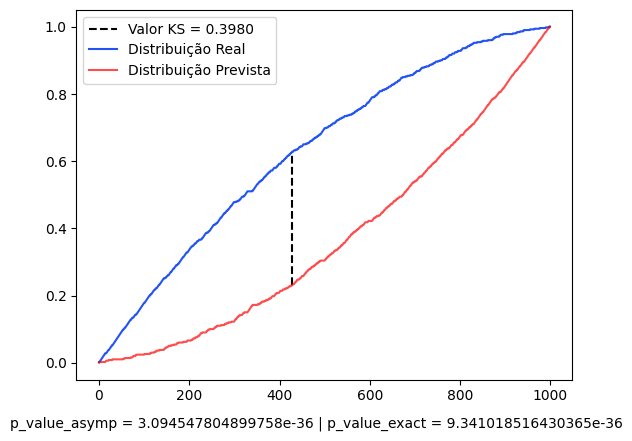

KstestResult(statistic=0.398, pvalue=9.341018516430365e-36, statistic_location=0.30290648319683405, statistic_sign=1)


In [ ]:
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 1, scale = 1, size = 500)

ks_val, p_value_asymp, p_value_exact = ks_2s(norm_a, norm_b, generate_plot = True)

print(scipy.stats.kstest(norm_a, norm_b, method = 'exact'))